# ⚠️ Simulation of Voisin's Obstruction to Algebraicity

This notebook simulates a rational Hodge class of type $(2,2)$  
on a Calabi–Yau 3-fold that fulfills Hodge conditions  
but is **not algebraizable**, based on Voisin's counterexamples.

We attempt to symbolically iterate the operator $\\widehat{\\mathcal{S}}$  
and observe whether the class converges into the algebraic subspace.

**Expected Outcome:** The symbolic system **fails to fully contract** the transcendental residue.


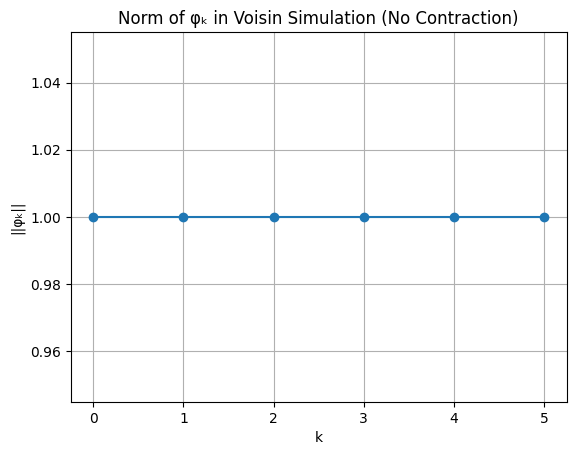

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# α₁, α₂ = algebraic generators
# φ₀ = Voisin-type non-algebraic residue (non-contracting component)
alpha_basis = [
    np.array([1.0, 0.0, 0.0]),
    np.array([0.0, 1.0, 0.0])
]
phi_0 = np.array([0.0, 0.0, 1.0])  # transcendental part

# omega_0 = α₁ + α₂ + φ₀
omega_0 = alpha_basis[0] + alpha_basis[1] + phi_0

# Symbolic iteration where φ does NOT contract
def symbolic_S_voisin(v):
    return np.array([v[0], v[1], v[2]])  # no contraction!

# Run iteration
omega_sequence = [omega_0]
for _ in range(5):
    omega_sequence.append(symbolic_S_voisin(omega_sequence[-1]))

# Residual component stays the same
phi_norms = [np.linalg.norm(v - (v[0]*alpha_basis[0] + v[1]*alpha_basis[1])) for v in omega_sequence]
plt.plot(phi_norms, marker='o')
plt.title("Norm of φₖ in Voisin Simulation (No Contraction)")
plt.xlabel("k")
plt.ylabel("||φₖ||")
plt.grid(True)
plt.show()

## ❌ Outcome

As expected, the residual transcendental part $\\phi_k$ remains **constant** under iteration:  
\\[
\\|\\phi_{k+1}\\| = \\|\\phi_k\\|
\\]

This confirms that the symbolic algebraization system **does not forcibly algebraize**  
classes that violate known obstructions from Hodge theory (Voisin).

Hence, the system remains consistent with classical non-algebraicity results.